In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
re.DOTALL
%matplotlib inline

In [38]:
dataFile = "/home/jovyan/data400_share/dataset.csv"
test_data = pd.read_csv(dataFile, dtype=object, nrows = 1000000) 
columns = test_data.columns
aggFolder = "Batches/"

In [39]:
test_data = test_data.drop(['Invoice/Item Number', 'Store Number', 'Store Name', 'Address', 'County Number', 'County', 'Category', 'Vendor Number', 'Vendor Name', 'Item Number', 'Item Description', 'Pack'],axis=1)

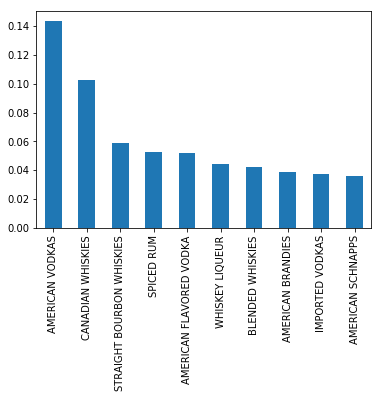

In [40]:
test_data['Category Name']= test_data['Category Name'].str.upper()
small = test_data[:1000]
(test_data['Category Name'].value_counts()/len(test_data))[:10].plot(kind='bar')

['TEQUILA' 'VODKA' 'WHISKIES' 'OTHER' 'LIQUEURS' 'SCHNAPPS' 'RUM'
 'BRANDIES' 'SCOTCH']


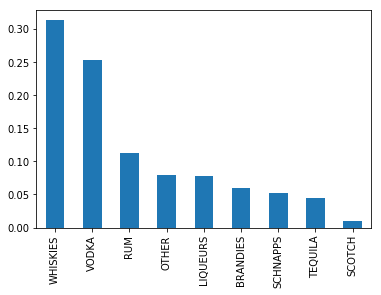

In [41]:
test_data['Category Name'].fillna('OTHER', inplace=True)
test_data = pd.read_csv(dataFile, dtype=object, nrows = 1000000) 
test_data[['Sale (Dollars)', 
           'Bottles Sold', 
           'Volume Sold (Liters)'
          ]] = test_data[['Sale (Dollars)', 
                          'Bottles Sold',                                         
                          'Volume Sold (Liters)'                                       
                         ]].apply(pd.to_numeric)
# print(test_data['Category Name'].unique())
test_data['Category Name'].fillna("OTHER", inplace=True)
test_data['Category Name']= test_data['Category Name'].str.upper()
test_data['Category Name'] = test_data['Category Name'].str.replace(".*VODKA.*", "VODKA")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*TEQUILA.*', "TEQUILA")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*GIN.*', "GIN")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*TEQUILA.*', "TEQUILA")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*RUM.*', "RUM")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*SCHNAPPS.*', "SCHNAPPS")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*BRANDIES.*', "BRANDIES")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*WHISKIES.*', "WHISKIES")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*WHISKEY.*', "WHISKIES")
# test_data['Category Name'] = test_data['Category Name'].str.replace('.*SCHNAPPS.*', "OTHER")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*SPECIAL.*', "OTHER")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*LIQUEUR.*', "LIQUEURS")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*SCOTCH.*', "SCOTCH")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*SPIRITS.*', "OTHER")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*LIQUEUR.*', "LIQUEURS")
test_data['Category Name'] = test_data['Category Name'].str.replace('.*COCKTAIL.*', "OTHER")
test_data['Category Name'] = test_data['Category Name'].str.replace('^((?!(VODKA|TEQUILA|RUM|SCHNAPPS|BRANDIES|WHISKIES|OTHER|LIQUEURS|SCOTCH)).)*$', "OTHER")
#|TEQUILA|RUM|SCHNAPPS|BRANDIES|WHISKIES|OTHER|LIQUEURS|SCOTCH
x = test_data['Category Name'].unique()
print(x)
(test_data['Category Name'].value_counts()/len(test_data)).plot(kind='bar')

In [3]:
def aggWHISKIES(column):
    return column[column == 'WHISKIES'].count()
def aggTEQUILA(column):
    return column[column == 'TEQUILA'].count()
def aggSCOTCH(column):
    return column[column == 'SCOTCH'].count()
def aggOTHER(column):
    return column[column == 'OTHER'].count()
def aggRUM(column):
    return column[column == 'RUM'].count()
def aggVODKA(column):
    return column[column == 'VODKA'].count()
def aggBRANDIES(column):
    return column[column == 'BRANDIES'].count()
def aggLIQUEURS(column):
    return column[column == 'LIQUEURS'].count()
def aggSCHNAPPS(column):
    return column[column == 'SCHNAPPS'].count()
def numRecords(column):
    return len(column)

In [4]:
def batchAgg(batch, nrows):
    # NOTE: as a way to check that we are chunking correctly, we look at invoice/item number of
    # the columns of the new dataset and the last row of the previous dataset. They should be the
    # same, because the columns of the new dataset will be overwritten, so the first new row of 
    # the new dataset will be the row following the last row of the old dataset
    if batch >= 1:
        data = pd.read_csv(dataFile,
                           nrows = nrows, 
                           skiprows = nrows * batch)
        print("first row:", data.columns.values[0])
        data.columns = columns
    else:
        data = pd.read_csv(dataFile,
                           nrows = nrows)
    data[['Sale (Dollars)', 
           'Bottles Sold', 
           'Volume Sold (Liters)'
          ]] = data[['Sale (Dollars)', 
                          'Bottles Sold',                                         
                          'Volume Sold (Liters)'                                       
                         ]].apply(pd.to_numeric)
    # print(test_data['Category Name'].unique())
    data['Category Name'].fillna("OTHER", inplace=True)
    data['Category Name']= data['Category Name'].str.upper()
    data['Category Name'] = data['Category Name'].str.replace(".*VODKA.*", "VODKA")
    data['Category Name'] = data['Category Name'].str.replace('.*TEQUILA.*', "TEQUILA")
    data['Category Name'] = data['Category Name'].str.replace('.*GIN.*', "GIN")
    data['Category Name'] = data['Category Name'].str.replace('.*TEQUILA.*', "TEQUILA")
    data['Category Name'] = data['Category Name'].str.replace('.*RUM.*', "RUM")
    data['Category Name'] = data['Category Name'].str.replace('.*SCHNAPPS.*', "SCHNAPPS")
    data['Category Name'] = data['Category Name'].str.replace('.*BRANDIES.*', "BRANDIES")
    data['Category Name'] = data['Category Name'].str.replace('.*WHISKIES.*', "WHISKIES")
    data['Category Name'] = data['Category Name'].str.replace('.*WHISKEY.*', "WHISKIES")
# test_data['Category Name'] = test_data['Category Name'].str.replace('.*SCHNAPPS.*', "OTHER")
    data['Category Name'] = data['Category Name'].str.replace('.*SPECIAL.*', "OTHER")
    data['Category Name'] = data['Category Name'].str.replace('.*LIQUEUR.*', "LIQUEURS")
    data['Category Name'] = data['Category Name'].str.replace('.*SCOTCH.*', "SCOTCH")
    data['Category Name'] = data['Category Name'].str.replace('.*SPIRITS.*', "OTHER")
    data['Category Name'] = data['Category Name'].str.replace('.*LIQUEUR.*', "LIQUEURS")
    data['Category Name'] = data['Category Name'].str.replace('.*COCKTAIL.*', "OTHER")
    data['Category Name'] = data['Category Name'].str.replace('^((?!(VODKA|TEQUILA|RUM|SCHNAPPS|BRANDIES|WHISKIES|OTHER|LIQUEURS|SCOTCH)).)*$', "OTHER")
#|TEQUILA|RUM|SCHNAPPS|BRANDIES|WHISKIES|OTHER|LIQUEURS|SCOTCH
    agg = data.groupby(['City', 'Date']).agg({'Category Name': [aggVODKA, 
                                                                   aggRUM,
                                                                   aggBRANDIES,
                                                                   aggSCHNAPPS, 
                                                                   aggWHISKIES, 
                                                                   aggTEQUILA, 
                                                                   aggSCOTCH,
                                                                   aggOTHER,
                                                                   aggLIQUEURS,
                                                                   numRecords,
                                                                  ],
                                                 'Volume Sold (Liters)': ['sum'], 
                                                 'Bottles Sold': ['sum'],
                                                 'Sale (Dollars)': ['sum']})
    agg.columns = [j if j != 'sum' else i for i,j in agg.columns]
    agg.reset_index(inplace=True)
    agg.to_csv(aggFolder + "agg%d.csv" % batch, index = False)
    val = len(data.index) == nrows
    print("last row:", data.iloc[len(data.index) - 1].values[0])
    return val

In [5]:
# Load data in 1,000,000 rows at a time to aggregate
batch = 0
while batchAgg(batch, 1000000):
    batch += 1

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


last row: INV-03698900072


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


first row: INV-03698900072
last row: INV-06674400142


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


first row: INV-06674400142
last row: INV-09367600026
first row: INV-09367600026
last row: INV-12356700060
first row: INV-12356700060
last row: S18978200110
first row: S18978200110
last row: S27349300170
first row: S27349300170
last row: S05165900042
first row: S05165900042
last row: S07065800033
first row: S07065800033
last row: S24466100024
first row: S24466100024
last row: S17738300012
first row: S17738300012
last row: S10166000015
first row: S10166000015
last row: S12846400037
first row: S12846400037
last row: S30473600014
first row: S30473600014
last row: S33318400041
first row: S33318400041
last row: INV-14204700091


In [52]:
aggData = [pd.read_csv(aggFolder + filename) for filename in os.listdir(aggFolder)
          if 'agg' in filename]
aggConcat = pd.concat(aggData)
final = aggConcat.groupby(['City', 'Date', ])[['Volume Sold (Liters)', 
                                                  'Bottles Sold', 
                                                  'Sale (Dollars)']].sum().reset_index()

In [53]:
reAgg = aggConcat.groupby(['City', 'Date']).sum().reset_index()
reAgg.to_csv('GrossSalesCountsDay.csv', index=False)

In [54]:
reAgg.aggVODKA = reAgg.aggVODKA / reAgg.numRecords
reAgg.aggRUM = reAgg.aggRUM / reAgg.numRecords
reAgg.aggBRANDIES = reAgg.aggBRANDIES / reAgg.numRecords
reAgg.aggTEQUILA = reAgg.aggTEQUILA / reAgg.numRecords
reAgg.aggSCHNAPPS = reAgg.aggSCHNAPPS / reAgg.numRecords
reAgg.aggWHISKIES = reAgg.aggWHISKIES / reAgg.numRecords
reAgg.aggSCOTCH = reAgg.aggSCOTCH / reAgg.numRecords
reAgg.aggOTHER = reAgg.aggOTHER / reAgg.numRecords
reAgg.aggLIQUEURS = reAgg.aggLIQUEURS / reAgg.numRecords

In [55]:
final.to_csv("GrossSales.csv", index=False)
reAgg.to_csv("GrossSalesDay.csv", index=False)

In [56]:
pd.read_csv("GrossSalesDay.csv").head()

,City,Date,aggVODKA,aggRUM,aggBRANDIES,aggSCHNAPPS,aggWHISKIES,aggTEQUILA,aggSCOTCH,aggOTHER,aggLIQUEURS,numRecords,Volume Sold (Liters),Bottles Sold,Sale (Dollars)
0,ACKLEY,01/04/2016,0.133333,0.066667,0.000000,0.000000,0.533333,0.000000,0.0,0.133333,0.133333,15,114.00,118,1858.58
1,ACKLEY,01/05/2015,0.312500,0.250000,0.000000,0.062500,0.250000,0.000000,0.0,0.125000,0.000000,16,163.99,158,1953.04
2,ACKLEY,01/06/2014,0.190476,0.047619,0.047619,0.047619,0.428571,0.047619,0.0,0.142857,0.047619,21,146.50,126,1260.57
3,ACKLEY,01/07/2013,0.125000,0.000000,0.062500,0.000000,0.500000,0.000000,0.0,0.187500,0.125000,16,98.75,96,955.93
4,ACKLEY,01/08/2013,0.250000,0.250000,0.000000,0.000000,0.250000,0.125000,0.0,0.000000,0.125000,8,61.50,72,686.59
